In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import csv
import os
from os.path import isfile, join
import re
import h5py
import random

In [8]:
#Le decimos la ruta 
rutaRE = r'/mnt/MD1200A/lconcha/videos/Datasets_RE_group32/'
rutaEA = r'/mnt/MD1200A/lconcha/videos/Datasets_EA_group32/'

#hacemos una lista de todos los archivos de la ruta
archivo_RE = os.listdir(rutaRE)
archivo_EA = os.listdir(rutaEA)

array_x = []
array_y = []

for l in archivo_EA:
    
    dataset_video_ataque = h5py.File ('/mnt/MD1200A/lconcha/videos/Datasets_EA_group32/'+ l)
    
    for line in dataset_video_ataque:
    
        if line[0] == 'X':
            array_x.append(dataset_video_ataque[line])

        if line [0] == 'Y':
            array_y.append(dataset_video_ataque[line])

for i in archivo_RE:
    
    dataset_video_reposo = h5py.File ('/mnt/MD1200A/lconcha/videos/Datasets_RE_group32/'+ i)
    
    for line in dataset_video_reposo:
    
        if line[0] == 'X':
            array_x.append(dataset_video_reposo[line])

        if line [0] == 'Y':
            array_y.append(dataset_video_reposo[line])
    

    
array_x_training = array_x[0:int(0.8*(len(array_x)))]
array_y_training = array_y[0:int(0.8*(len(array_y)))]

c = list(zip(array_x_training, array_y_training))
random.shuffle(c)

array_x_training, array_y_training = zip(*c)

array_x_validation = array_x[int(0.8*(len(array_x))):len(array_x)]
array_y_validation = array_y[int(0.8*(len(array_y))):len(array_y)]

d = list(zip(array_x_validation, array_y_validation))
random.shuffle(d)

array_x_validation, array_y_validation = zip(*d)

with h5py.File('/mnt/MD1200A/lconcha/videos/dataset_combinado_training_group32', 'w') as h5File:
    
    contador = 1
    for line in array_x_training:
        Xset = h5File.create_dataset('X' + str(contador), data= line.value)
        contador += 1
        
    contador = 1    
    for line in array_y_training:
        Yset = h5File.create_dataset('Y' + str(contador), data= line.value)
        contador += 1
        
with h5py.File('/mnt/MD1200A/lconcha/videos/dataset_combinado_validation_group32', 'w') as h5File:
    
    contador = 1
    for line in array_x_validation:
        Xset = h5File.create_dataset('X' + str(contador), data= line.value)
        contador += 1
        
    contador = 1
    for line in array_y_validation:
        Yset = h5File.create_dataset('Y' + str(contador), data= line.value)
        contador += 1

/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


KeyboardInterrupt: 

# Lo mismo que la celda anterior + 50/50 EA/RE + DATASET PARA TESTING EN PROPORCIONES 60% TRAIN, 20% VALI, 20%TEST

In [7]:
rutaEA = r'/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_EA_32_corregidos/'
rutaRE = r'/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_RE_32_corregidos/'

archivo_EA = os.listdir(rutaEA)
archivo_RE = os.listdir(rutaRE)

array_x_EA = []
array_y_EA = []

array_x_RE = []
array_y_RE = []

for l in archivo_EA:
    
    dataset_video_ataque = h5py.File ('/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_EA_32_corregidos/'+ l)
    
    for line in dataset_video_ataque:
        
        if line[0] == 'X':
            array_x_EA.append(dataset_video_ataque[line])

        if line [0] == 'Y':
            array_y_EA.append(dataset_video_ataque[line])
            
for i in archivo_RE:
    
    dataset_video_reposo = h5py.File ('/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_RE_32_corregidos/'+ i)
    
    for line in dataset_video_reposo:
    
        if line[0] == 'X':
            array_x_RE.append(dataset_video_reposo[line])

        if line [0] == 'Y':
            array_y_RE.append(dataset_video_reposo[line])
            

a = list(zip(array_x_RE, array_y_RE))
random.shuffle(a)
array_x_RE, array_y_RE = zip(*a)


array_x = array_x_EA + list(array_x_RE[:len(array_x_EA)])
array_y = array_y_EA + list(array_y_RE[:len(array_x_EA)])

b = list(zip(array_x, array_y))
random.shuffle(b)
array_x, array_y = zip(*b)

array_x_training = array_x[0:int(0.6*(len(array_x)))]
array_y_training = array_y[0:int(0.6*(len(array_y)))]

c = list(zip(array_x_training, array_y_training))
random.shuffle(c)
array_x_training, array_y_training = zip(*c)

array_x_validation = array_x[int(0.6*(len(array_x))):int(0.8*(len(array_x)))]
array_y_validation = array_y[int(0.6*(len(array_y))):int(0.8*(len(array_x)))]

d = list(zip(array_x_validation, array_y_validation))
random.shuffle(d)
array_x_validation, array_y_validation = zip(*d)

array_x_test = array_x[int(0.8*(len(array_x))):len(array_x)]
array_y_test = array_y[int(0.8*(len(array_y))):len(array_y)]

e = list(zip(array_x_test, array_y_test))
random.shuffle(e)
array_x_test, array_y_test = zip(*e)



with h5py.File('/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_corregidos_training/Combinado_training_corregido_2', 'w') as h5File:
    
    contador = 1
    for line in array_x_training:
        Xset = h5File.create_dataset('X' + str(contador), data= line.value)
        contador += 1
        
    contador = 1    
    for line in array_y_training:
        Yset = h5File.create_dataset('Y' + str(contador), data= line.value)
        contador += 1
        
with h5py.File('/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_corregidos_training/Combinado_validation_corregido_2', 'w') as h5File:
    
    contador = 1
    for line in array_x_validation:
        Xset = h5File.create_dataset('X' + str(contador), data= line.value)
        contador += 1
        
    contador = 1
    for line in array_y_validation:
        Yset = h5File.create_dataset('Y' + str(contador), data= line.value)
        contador += 1
        
with h5py.File('/mnt/MD1200A/lconcha/videos/128x128_Datasets_corregidos/Datasets_corregidos_training/Combinado_test_corregido_2', 'w') as h5File:
    
    contador = 1
    for line in array_x_test:
        Xset = h5File.create_dataset('X' + str(contador), data= line.value)
        contador += 1
        
    contador = 1
    for line in array_y_test:
        Yset = h5File.create_dataset('Y' + str(contador), data= line.value)
        contador += 1

/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  from ipykernel import kernelapp as app
/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/p

El numero total de ejemplos es: 3560(60% Training, 20% Validation y 20% Test)


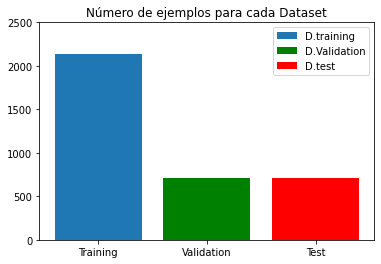

In [4]:
print('El numero total de ejemplos es:' + ' ' + str(len(array_x)) + '(60% Training, 20% Validation y 20% Test)')

plt.bar('Training',len(array_x_training), align='center')
plt.bar('Validation',len(array_x_validation), color='g',align='center')
plt.bar('Test',len(array_x_test), color='r',align='center')
plt.title('Número de ejemplos para cada Dataset')
plt.legend(['D.training','D.Validation','D.test'])


plt.ylim(0,2500)
plt.show()
#plt.savefig('/mnt/MD1200A/lconcha/videos/256x256/Datasets_training_256/total-ejemplos-blackwhite.png', dpi = 500)

/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if __name__ == '__main__':
/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # This is added back by InteractiveShellApp.init_path()
/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/cm/shared/apps/anaconda2/4.3.1/envs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: H5pyDeprecationWarning: dataset.value has been deprecated. Use datas

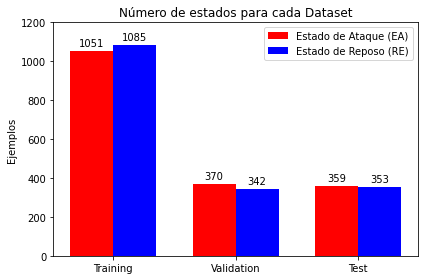

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

count_RE = 0
count_EA = 0

for i in array_y_training:
    if i.value == 'EA':
        count_EA +=1
    if i.value == 'RE':
        count_RE +=1


count_RE_v = 0
count_EA_v = 0

for i in array_y_validation:
    if i.value == 'EA':
        count_EA_v +=1
    if i.value == 'RE':
        count_RE_v +=1

count_RE_t = 0
count_EA_t = 0

for i in array_y_test:
    if i.value == 'EA':
        count_EA_t +=1
    if i.value == 'RE':
        count_RE_t +=1
        

labels = ['Training', 'Validation', 'Test']
EA = [count_EA, count_EA_v,count_EA_t]
RE = [count_RE, count_RE_v,count_RE_t]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, EA, width, color ='r', label='Estado de Ataque (EA)')
rects2 = ax.bar(x + width/2, RE, width, color ='b', label='Estado de Reposo (RE)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ejemplos')
ax.set_title('Número de estados para cada Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.ylim(0,1200)
plt.show()
#plt.savefig('/mnt/MD1200A/lconcha/videos/256x256/Datasets_training_256/ejemplosxdataset.png', dpi = 500)